# Homework #1
## In this homework you are going to get familiar with basics of NetworkX and Gephi for analysing and visualizing networks.

## Task 1
### NetworkX is a Python library for the analysis of networks. With NetworkX you can create, import, manipulate graphs. Additionally, you can calculate some basic properties of these graphs with its built-in functions. Unfortunately, NetworkX is not very powerful for visualizing large graphs which we are going to work with most of the time. For this reason, we are going to use a software called Gephi. In this homework, you are going to do some basic analysis on some famous graphs and then store the results in a format readable by Gephi. You then use Gephi to have a meaningful visualization of these results.  

### You can download Gephi from the following web page:
### https://gephi.org/users/download

###  You can also learn the basics of NetworkX library and Gephi by looking at the following pages:
### Some useful links to get familiar with NetworkX:
### https://vimeo.com/124354692
### https://www.cl.cam.ac.uk/~cm542/teaching/2010/stna-pdfs/stna-lecture8.pdf
### Some useful links to get familiar with Gephi:
### https://gephi.org/users/tutorial-visualization/
### https://www.youtube.com/watch?v=FLiv3xnEepw

### Run the following cell to import the libraries that we are going to use in this homework:

In [1]:
%%time
#import useful packages, all of them are important but not necessarily used in this code
#enable inline plotting in Python Notebook
#supress warnings

%pylab inline
import networkx as nx
import numpy as np
import matplotlib
import scipy
import warnings
warnings.filterwarnings('ignore')
import time
import os
import pickle

Populating the interactive namespace from numpy and matplotlib
Wall time: 4.99 s


### Run the following cell to unzip and store the Facebook dateset in a .txt file which is readable by NetworkX:

In [2]:
%%time
# The following code simply converts the data file from ZIP to TXT so that NetworkX can read it

import gzip
inF = gzip.GzipFile("data/facebook/facebook_combined.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = open("data/facebook/facebook_combined.txt", 'wb')
outF.write(s)
outF.close()

CPU times: user 14 ms, sys: 1.92 ms, total: 15.9 ms
Wall time: 19.9 ms


In [3]:
%%time
#load the network after converting into text file

file_name="data/facebook/facebook_combined.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g1=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g1.order(),g1.size()
print("No. of nodes are=",node)
print("No. of edges are=",edge)

No. of nodes are= 4039
No. of edges are= 88234
CPU times: user 327 ms, sys: 24.4 ms, total: 351 ms
Wall time: 350 ms


### Write a code that plots the degree distribution of the above graph. (Make sure you do not confuse degree distribution with degree sequence!)

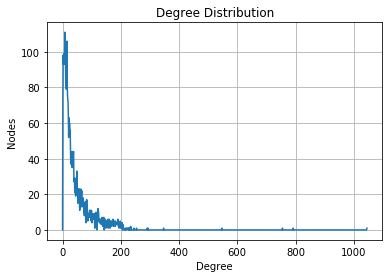

In [47]:
from matplotlib import pyplot as plt
degrees=[g1.degree(n) for n in g1.nodes]
degree_sequence=sorted(degrees,reverse=True)
dmax=max(degree_sequence)
dmin=min(degree_sequence)
deg_range=range(0,dmax+2)
hist,deg_range=np.histogram(degree_sequence,deg_range)
plt.plot(hist)
plt.xlabel('Degree')
plt.ylabel('Nodes')
plt.title('Degree Distribution')
plt.grid()


### Write a code that calculates and prints the network diameter and the average shortest path.

In [48]:
diameter=nx.diameter(g1)
print('Diameter of the graph: ' + str(diameter))

Diameter of the graph: 8


In [49]:
avg_shortest_path=nx.average_shortest_path_length(g1)
print('The average shortest path of the graph: ' +str(avg_shortest_path))

The average shortest path of the graph: 3.6925068496963913


### Write a code to calculate the clustering coefficient of the nodes of the graph and plot it.

In [7]:
clustering_coefficient_fb=nx.clustering(g1)
file=open('fb_cc.txt','wb')
pickle.dump(clustering_coefficient_fb,file)
file.close()

Text(0.5, 1.0, 'Clustering Coefficient Plot')

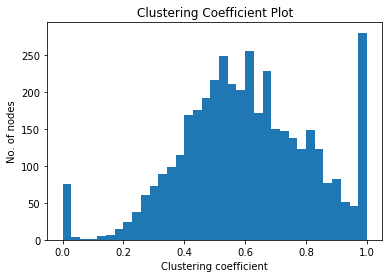

In [11]:
file=open('fb_cc.txt','rb')
clustering_coefficient_fb=pickle.load(file)
file.close()
plt.hist(list(clustering_coefficient_fb.values()),bins=35)
plt.xlabel('Clustering coefficient')
plt.ylabel('No. of nodes')
plt.title('Clustering Coefficient Plot')

### Write a code to calculate the degree centrality of the nodes of the graph and plot it.

Text(0.5, 1.0, 'Degree Centrality Plot')

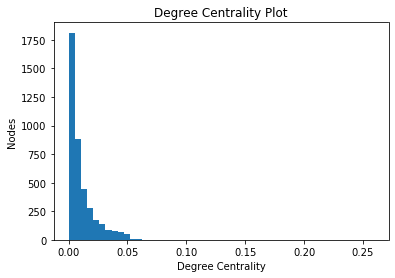

In [59]:
deg_centrality_fb=nx.degree_centrality(g1)
plt.hist(list(deg_centrality_fb.values()),bins=50)
plt.xlabel('Degree Centrality')
plt.ylabel('Nodes')
plt.title('Degree Centrality Plot')


### Write a code to calculate the betweenness centrality of the nodes of the graph and plot it.

Text(0.5, 1.0, 'Betweenness Centrality Plot')

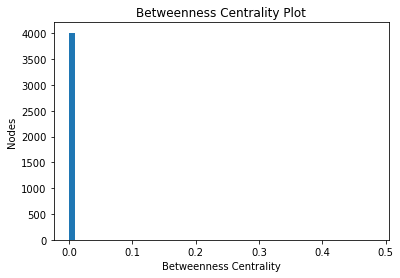

In [60]:
btw_centrality_fb=nx.betweenness_centrality(g1)
plt.hist(list(btw_centrality_fb.values()),bins=50)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Nodes')
plt.title('Betweenness Centrality Plot')

### Write a code to calculate the eigenvector centrality of the nodes of the graph and plot it.

Text(0.5, 1.0, 'Eigenvector Centrality Plot')

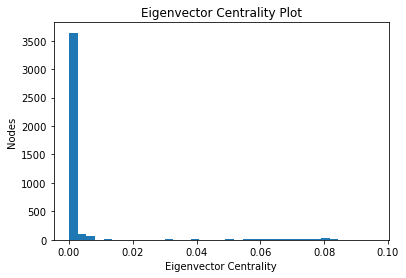

In [61]:
eig_centrality_fb=nx.eigenvector_centrality(g1)
plt.hist(list(eig_centrality_fb.values()),bins=35)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Nodes')
plt.title('Eigenvector Centrality Plot')

### Write a code to store the graph in a file that is readable by Gephi (Hint: Use NetworkX write_gml method.) Make sure to add the betweenness centrality and degree of each node as an attribute of each node to be stored in this file for the next task.

In [62]:
nx.set_node_attributes(g1,btw_centrality_fb,'betweenness')
degrees=[g1.degree(n) for n in g1.nodes]
deg_dictionary={n:deg for n, deg in enumerate(degrees)}
#print(deg_dictionary)
nx.set_node_attributes(g1,deg_dictionary,'degree')
nx.write_gml(g1,'facebook_data.gml')

### Repeat the above parts for the other three networks.

## Enron email network analysis

In [9]:
%%time
# The following code simply converts the data file from ZIP to TXT so that NetworkX can read it

import gzip
inF = gzip.GzipFile("data/enron/email-Enron.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = open("data/enron/email-Enron.txt", 'wb')
outF.write(s)
outF.close()

CPU times: user 46.9 ms, sys: 11.1 ms, total: 58 ms
Wall time: 72.4 ms


In [10]:
%%time
#load the network after converting into text file

file_name="data/enron/email-Enron.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g2=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g2.order(),g2.size()
print("No. of nodes are=",node)
print("No. of edges are=",edge)

No. of nodes are= 36692
No. of edges are= 183831
CPU times: user 1.26 s, sys: 77 ms, total: 1.34 s
Wall time: 1.35 s


CPU times: user 79.3 ms, sys: 3 ms, total: 82.3 ms
Wall time: 98.5 ms


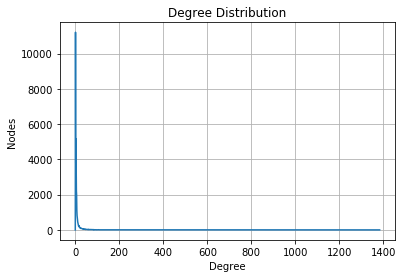

In [65]:
%%time
degrees=[g2.degree(n) for n in g2.nodes]
degree_sequence=sorted(degrees,reverse=True)
dmax=max(degree_sequence)
dmin=min(degree_sequence)
deg_range=range(0,dmax+2)
hist,deg_range=np.histogram(degree_sequence,deg_range)
plt.plot(hist)
plt.xlabel('Degree')
plt.ylabel('Nodes')
plt.title('Degree Distribution')
plt.grid()

In [7]:
%%time
sg2=list(nx.connected_component_subgraphs(g2))




CPU times: user 1.46 s, sys: 39.2 ms, total: 1.5 s
Wall time: 1.55 s


In [67]:
diameter=nx.diameter(sg2[0])
sp=nx.average_shortest_path_length(sg2[0])
print('the diameter is: '+ str(diameter))
print('the average shortest path is: '+ str(sp))

the diameter is: 13
the average shortest path is: 4.025163988178407


In [12]:
clustering_coefficient_enron=nx.clustering(g2)
file=open('enron_cc.txt','wb')
pickle.dump(clustering_coefficient_enron,file)
file.close()

Text(0.5, 1.0, 'Clustering Coefficient Plot')

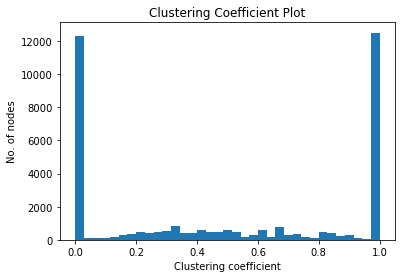

In [14]:
file=open('enron_cc.txt','rb')
clustering_coefficient_enron=pickle.load(file)
file.close()
plt.hist(list(clustering_coefficient_enron.values()),bins=35)
plt.xlabel('Clustering coefficient')
plt.ylabel('No. of nodes')
plt.title('Clustering Coefficient Plot')

CPU times: user 51.9 ms, sys: 5.01 ms, total: 56.9 ms
Wall time: 52.7 ms


Text(0.5, 1.0, 'Degree Centrality Plot')

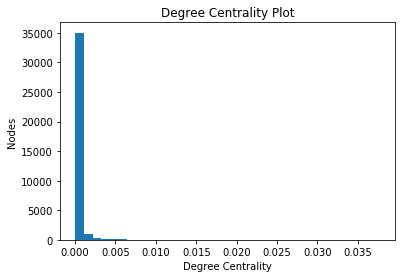

In [71]:
%%time
deg_centrality_enron=nx.degree_centrality(g2)
plt.hist(list(deg_centrality_enron.values()),bins=35)
plt.xlabel('Degree Centrality')
plt.ylabel('Nodes')
plt.title('Degree Centrality Plot')

Text(0.5, 1.0, 'Betweenness Centrality Plot')

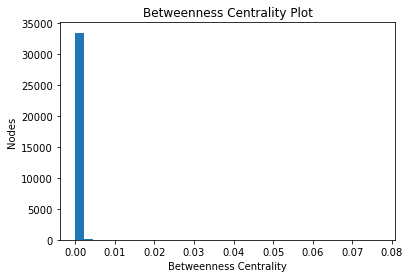

In [8]:
btw_centrality_enron=nx.betweenness_centrality(sg2[0])
plt.hist(list(btw_centrality_enron.values()),bins=35)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Nodes')
plt.title('Betweenness Centrality Plot')

Text(0.5, 1.0, 'Eigenvector Centrality Plot')

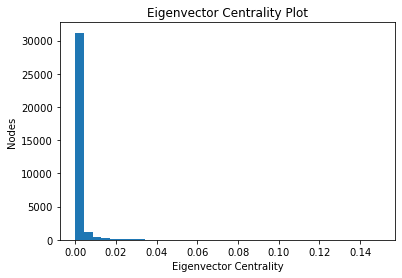

In [9]:
eig_centrality_enron=nx.eigenvector_centrality(sg2[0])
plt.hist(list(eig_centrality_enron.values()),bins=35)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Nodes')
plt.title('Eigenvector Centrality Plot')
#plt.hist(eig_centrality)
#plt.plot(list(eig_centrality.keys()),list(eig_centrality.values()))

In [10]:
nx.set_node_attributes(g2,btw_centrality_enron,'betweenness')
degrees=[g2.degree(n) for n in g2.nodes]
deg_dictionary={n:deg for n, deg in enumerate(degrees)}
#print(deg_dictionary)
nx.set_node_attributes(g2,deg_dictionary,'degree')
nx.write_gml(g2,'enron_data.gml')

## 'citNet'- Citation network analysis

In [2]:
from functools import reduce

In [3]:
# uncompress .txt.gz to .txt
import gzip
inF = gzip.GzipFile("data/cit-HepTh.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = open("data/cit-HepTh.txt", 'wb')
outF.write(s)
outF.close()

# uncompress cit-HepTh-abstracts.tar.gz
import tarfile
tarfile.open("data/cit-HepTh-abstracts.tar.gz").extractall("data/cit-HepTh-abstracts")

 



 

 


 

In [4]:
%%time
#load the network after converting into text file

file_name="data/cit-HepTh.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g3=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g3.order(),g3.size()
print("No. of nodes are=",node)
print("No. of edges are=",edge)

No. of nodes are= 27770
No. of edges are= 352324
Wall time: 1.3 s


In [5]:
# extract the author name
def get_authors(l):
    authors = reduce(list.__add__, [a.split(",") for a in l[9:].split("and")])
    return [x.strip() for x in authors]

CPU times: user 108 ms, sys: 0 ns, total: 108 ms
Wall time: 123 ms


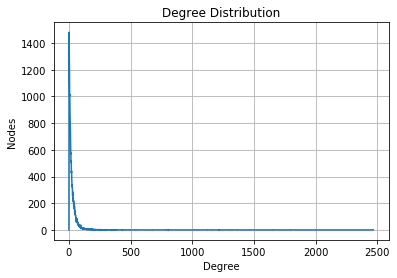

In [6]:
%%time
degrees=[g3.degree(n) for n in g3.nodes]
degree_sequence=sorted(degrees,reverse=True)
dmax=max(degree_sequence)
dmin=min(degree_sequence)
deg_range=range(0,dmax+2)
hist,deg_range=np.histogram(degree_sequence,deg_range)
plt.plot(hist)
plt.xlabel('Degree')
plt.ylabel('Nodes')
plt.title('Degree Distribution')
plt.grid()


In [19]:
clustering_coefficient_citnet=nx.clustering(g3)
file=open('citnet_cc.txt','wb')
pickle.dump(clustering_coefficient_citnet,file)
file.close()

Text(0.5, 1.0, 'Clustering Coefficient Plot')

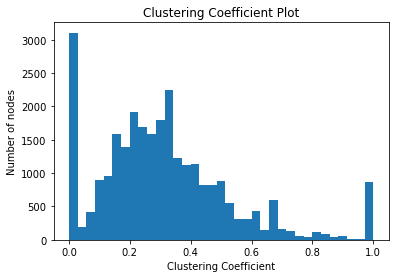

In [21]:
file=open('citnet_cc.txt','rb')
clustering_coefficient_citnet=pickle.load(file)
file.close()
plt.hist(list(clustering_coefficient_citnet.values()),bins=35)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of nodes')
plt.title('Clustering Coefficient Plot')

In [8]:
%%time
sg3=list(nx.connected_component_subgraphs(g3))
graph_max=sg3[0]

CPU times: user 2.94 s, sys: 0 ns, total: 2.94 s
Wall time: 2.95 s


In [20]:
%%time
diameter_citnet=nx.diameter(graph_max)
sp_citnet=nx.average_shortest_path_length(graph_max)
print('the diameter is: '+ str(diameter_citnet))
print('the average shortest path is: '+ str(sp_citnet))

the diameter is: 15
the average shortest path is: 4.278680083960654
CPU times: user 5h 7min 19s, sys: 54.4 s, total: 5h 8min 13s
Wall time: 5h 17min 52s


CPU times: user 55.5 ms, sys: 6 ms, total: 61.5 ms
Wall time: 76.9 ms


Text(0.5, 1.0, 'Degree Centrality Plot')

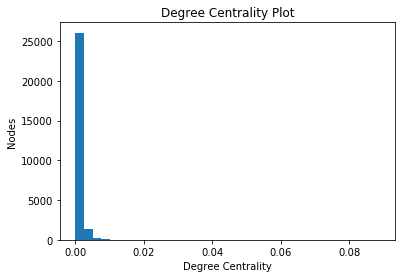

In [10]:
%%time
deg_centrality_citnet=nx.degree_centrality(g3)
dc=deg_centrality_citnet
plt.hist(list(deg_centrality_citnet.values()),bins=35)
plt.xlabel('Degree Centrality')
plt.ylabel('Nodes')
plt.title('Degree Centrality Plot')

CPU times: user 2h 57min 34s, sys: 1.92 s, total: 2h 57min 36s
Wall time: 2h 59min 14s


Text(0.5, 1.0, 'Betweenness Centrality Plot')

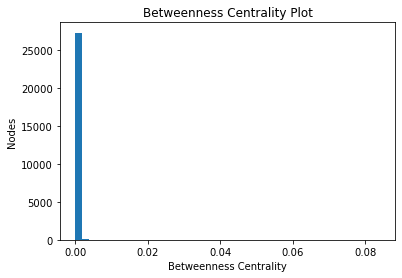

In [9]:
%%time
btw_centrality_citnet=nx.betweenness_centrality(graph_max)
plt.hist(list(btw_centrality_citnet.values()),bins=45)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Nodes')
plt.title('Betweenness Centrality Plot')

CPU times: user 5.07 s, sys: 1.01 ms, total: 5.08 s
Wall time: 5.22 s


Text(0.5, 1.0, 'Eigenvector Centrality Plot')

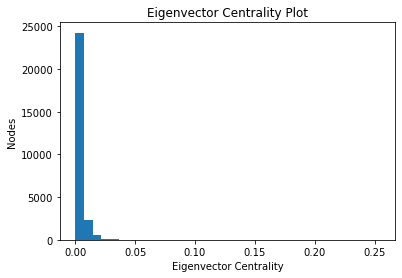

In [27]:
%%time
eig_centrality_citnet=nx.eigenvector_centrality(graph_max)
plt.hist(list(eig_centrality_citnet.values()),bins=35)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Nodes')
plt.title('Eigenvector Centrality Plot')

In [12]:
# attach the attribute author
# here G is your networkX graph
for k in g3.nodes():
    g3.node[k]['dc']=deg_centrality_citnet[k]
import os
thred = sorted(dc.values(), reverse=True)[100]
for subdir, dirs, files in os.walk("data/cit-HepTh-abstracts"):
    for fl in files:
        filepath = subdir + os.sep + fl
        
        if filepath.endswith(".abs"):
            node_num = int(fl[:-4])
            name = ""
            for l in open(filepath):
                if l.startswith("Authors:"):
                    name = get_authors(l)[0]
            if node_num in graph_max.nodes():
                if g3.node[node_num]['dc'] > thred:
                    g3.node[node_num]['author'] = name
                elif 'author' in g3.node[node_num]:
                    del g3.node[node_num]['author']

In [13]:
nx.set_node_attributes(g3,btw_centrality_citnet,'betweenness')
degrees=[g3.degree(n) for n in g3.nodes]
deg_dictionary={n:deg for n, deg in enumerate(degrees)}
#print(deg_dictionary)
nx.set_node_attributes(g3,deg_dictionary,'degree')


In [14]:
nx.write_gml(g3,'citnet_data.gml')

Erdos Network Analysis

In [22]:
%%time
# build Collaboration Network
# undirected network
g4 = nx.Graph()

# add Paul Erdos into our network at first
dict_authors = {}
dict_authors['Paul Erdos'] = 0
g4.add_node(0)
g4.node[0]['author'] = 'Paul Erdos'

# add the authors with Erdos number 1 and 2 from file
line_count = 1
skip_line = 24
skip_space = 1

is_new = False
author = ""
coauthor = ""
index = 1
ind_author = 1
ind_coauthor = 1

def parseLine(l, start):
    end = start
    while end < len(l) - 1 and not (l[end] == ' ' and l[end + 1] == ' '):
        end += 1
    return l[start:end]

def addAuthor(auth, ind):
    if auth in dict_authors:
        return ind
    dict_authors[auth] = ind
    return ind + 1

for l in open("data/erdos/Erdos1.html"):    
    if line_count >= skip_line:
        if l == '\n':
            is_new = True
        elif is_new:
            author = parseLine(l, 0)
            index = addAuthor(author, index)
            ind_author = dict_authors[author]
            g4.add_edge(0, ind_author)
            g4.node[ind_author]['author'] = author
            is_new = False
        elif l == '</pre>':
            break
        else:
            coauthor = parseLine(l, skip_space)
            index = addAuthor(coauthor, index)
            ind_coauthor = dict_authors[coauthor]
            g4.add_edge(ind_author, ind_coauthor)
            g4.node[ind_coauthor]['author'] = coauthor
    line_count += 1

print(nx.info(g4))

Name: 
Type: Graph
Number of nodes: 11524
Number of edges: 18504
Average degree:   3.2114
CPU times: user 199 ms, sys: 0 ns, total: 199 ms
Wall time: 200 ms


CPU times: user 41.8 ms, sys: 1.3 ms, total: 43.1 ms
Wall time: 40.3 ms


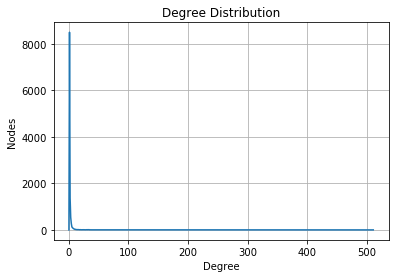

In [35]:
%%time
degrees=[g4.degree(n) for n in g4.nodes]
degree_sequence=sorted(degrees,reverse=True)
dmax=max(degree_sequence)
dmin=min(degree_sequence)
deg_range=range(0,dmax+2)
hist,deg_range=np.histogram(degree_sequence,deg_range)
plt.plot(hist)
plt.xlabel('Degree')
plt.ylabel('Nodes')
plt.title('Degree Distribution')
plt.grid()

In [36]:
%%time
diameter_erdos=nx.diameter(g4)
sp_erdos=nx.average_shortest_path_length(g4)
print('the diameter is: '+ str(diameter_erdos))
print('the average shortest path is: '+ str(sp_erdos))

the diameter is: 4
the average shortest path is: 3.821987433309889
CPU times: user 9min 35s, sys: 63.9 ms, total: 9min 35s
Wall time: 9min 56s


In [23]:
%%time
clustering_coefficient_erdos=nx.clustering(g4)
file=open('erdos_cc.txt','wb')
pickle.dump(clustering_coefficient_erdos,file)
file.close()

CPU times: user 369 ms, sys: 0 ns, total: 369 ms
Wall time: 376 ms


Text(0.5, 1.0, 'Clustering Coefficient Plot')

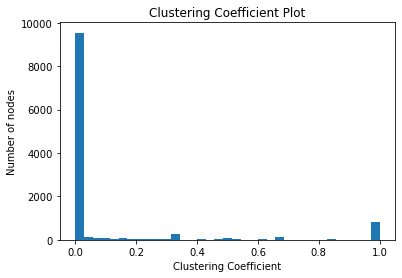

In [24]:
file=open('erdos_cc.txt','rb')
clustering_coefficient_erdos=pickle.load(file)
file.close()
plt.hist(list(clustering_coefficient_erdos.values()),bins=35)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of nodes')
plt.title('Clustering Coefficient Plot')

CPU times: user 42.7 ms, sys: 3.99 ms, total: 46.7 ms
Wall time: 65.3 ms


Text(0.5, 1.0, 'Degree Centrality Plot')

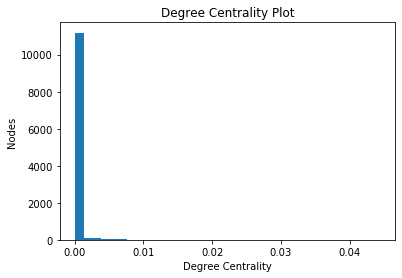

In [38]:
%%time
deg_centrality_erdos=nx.degree_centrality(g4)
plt.hist(list(deg_centrality_erdos.values()),bins=35)
plt.xlabel('Degree Centrality')
plt.ylabel('Nodes')
plt.title('Degree Centrality Plot')

CPU times: user 13min 1s, sys: 496 ms, total: 13min 1s
Wall time: 13min 18s


Text(0.5, 1.0, 'Betweenness Centrality Plot')

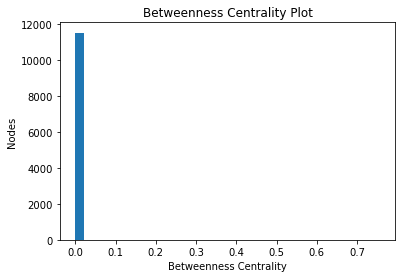

In [39]:
%%time
btw_centrality_erdos=nx.betweenness_centrality(g4)
plt.hist(list(btw_centrality_erdos.values()),bins=35)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Nodes')
plt.title('Betweenness Centrality Plot')

CPU times: user 351 ms, sys: 1 ms, total: 352 ms
Wall time: 372 ms


Text(0.5, 1.0, 'Eigenvector Centrality Plot')

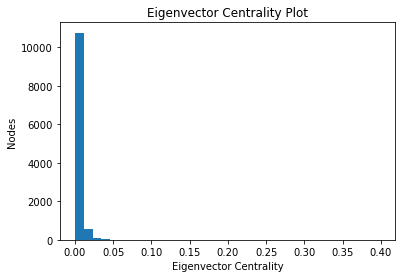

In [40]:
%%time
eig_centrality_erdos=nx.eigenvector_centrality(g4)
plt.hist(list(eig_centrality_erdos.values()),bins=35)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Nodes')
plt.title('Eigenvector Centrality Plot')

In [41]:
nx.set_node_attributes(g4,btw_centrality_citnet,'betweenness')
degrees=[g4.degree(n) for n in g4.nodes]
deg_dictionary={n:deg for n, deg in enumerate(degrees)}
#print(deg_dictionary)
nx.set_node_attributes(g4,deg_dictionary,'degree')
nx.write_gml(g4,'erdos_data.gml')

## Task 2
### In this task we will use Gephi to visualize the networks that you analyzed. In the previous task, you saved the graph in the graphml format such that each node has its degree and its betweenness centrality as its attribute. In this task, you are going to use these attributes to have a better visualization of the graph. Follow these steps to obtain a nice and meaningful visualization of the graphs:

### Open Gephi-->> Open the '.gml' file of a network -->> Change 'Layout' of the graph to Force Atlas 2, etc. to have a better visualisation -->> In the 'Appearance' window there are multiple options to change the appearance of the nodes/ edges of the graph according to various network properties like degree, clustering coefficient, modularity class, etc.-->> Set the node sizes according to Degree distribution. -->> Save the image file and include it in the following cell for each of the above networks.

### Respond to the following questions for the Facebook and Enron-email datasets.
#### 1) Visualize the network in Gephi by using a suitable layout, with the node size as well as the node label / Id proportional to the degree distribution of each node. Use 3 different colors to differentiate nodes with high, moderate and low degree distributions.
#### 2) Repeat (1) with the node size as well as the node label / Id size proportional to the betweenness centrality.
#### 3) Analyze all the graphs and explain which of the nodes according to you are the most important ones, as far as the network structure is concerned. Why?

Facebook graph plot where node size and color is proportional to the degree centrality:

In [6]:
from IPython.display import Image

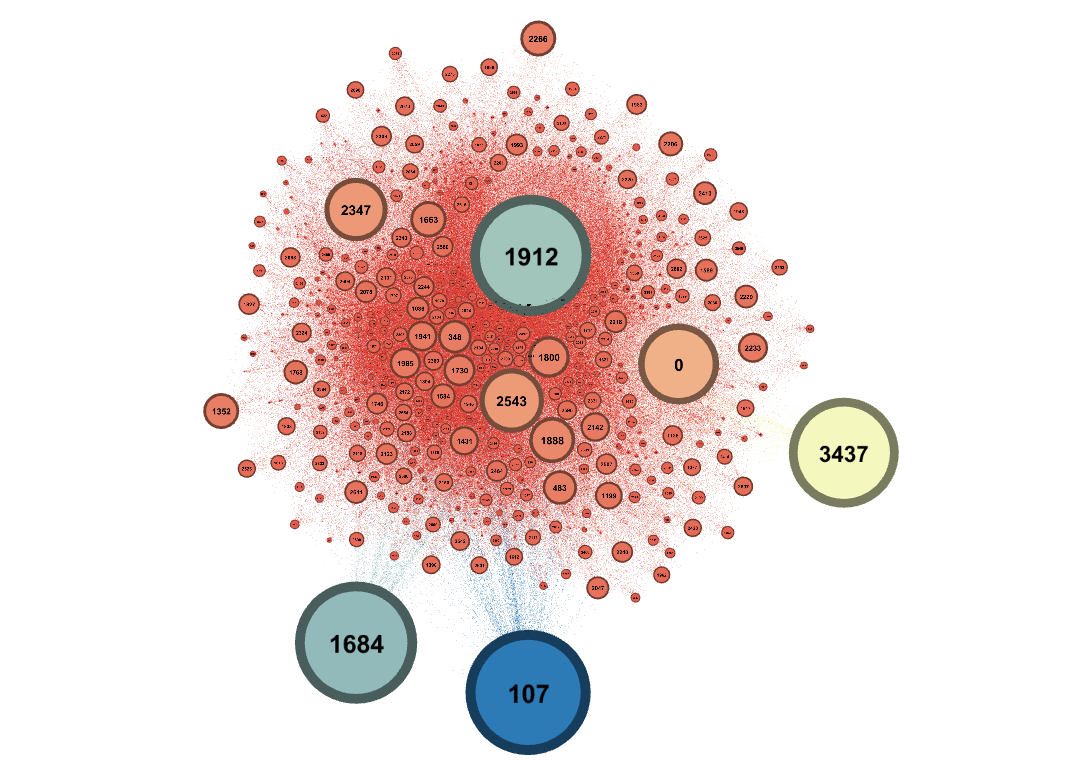

In [7]:
Image(filename='fb_degree.png')

Facebook graph plot where node size and color is proportional to the betweennness centrality:

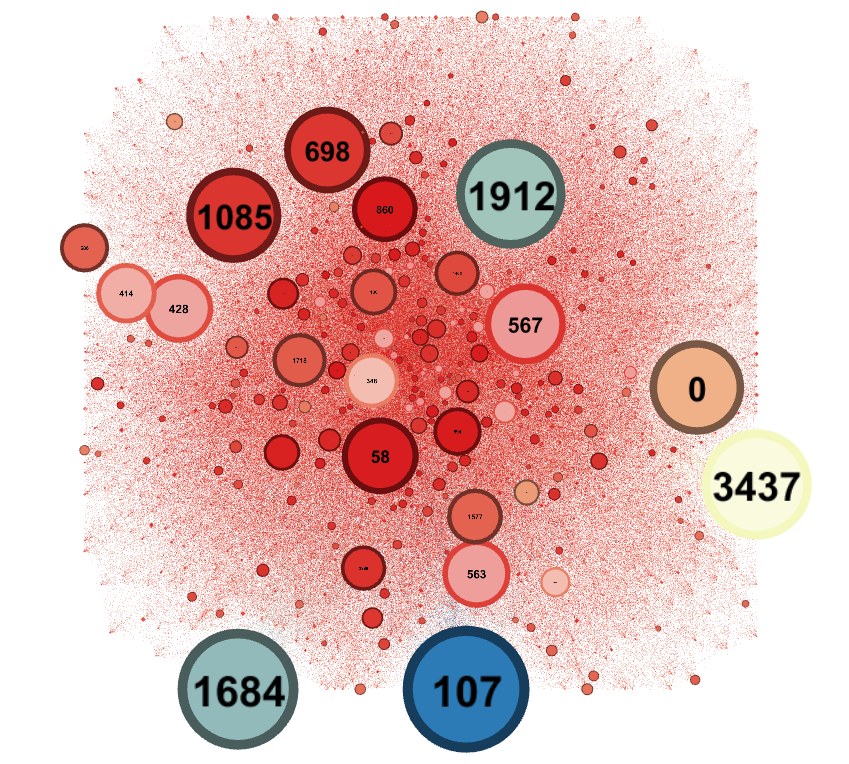

In [9]:
Image(filename='fb_betweenness.png')

Enron graph plot where node size and color is proportional to the degree centrality:

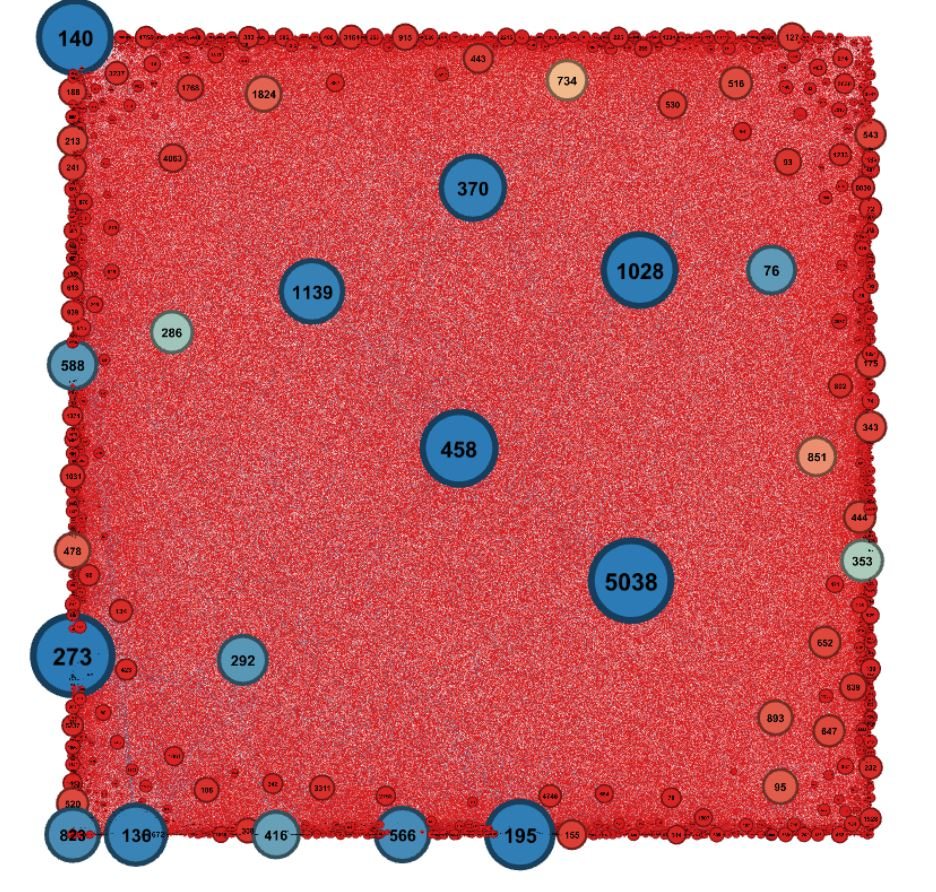

In [10]:
Image(filename='enron_degree.JPG')

Enron graph plot where node size and color is proportional to the betweenness centrality:

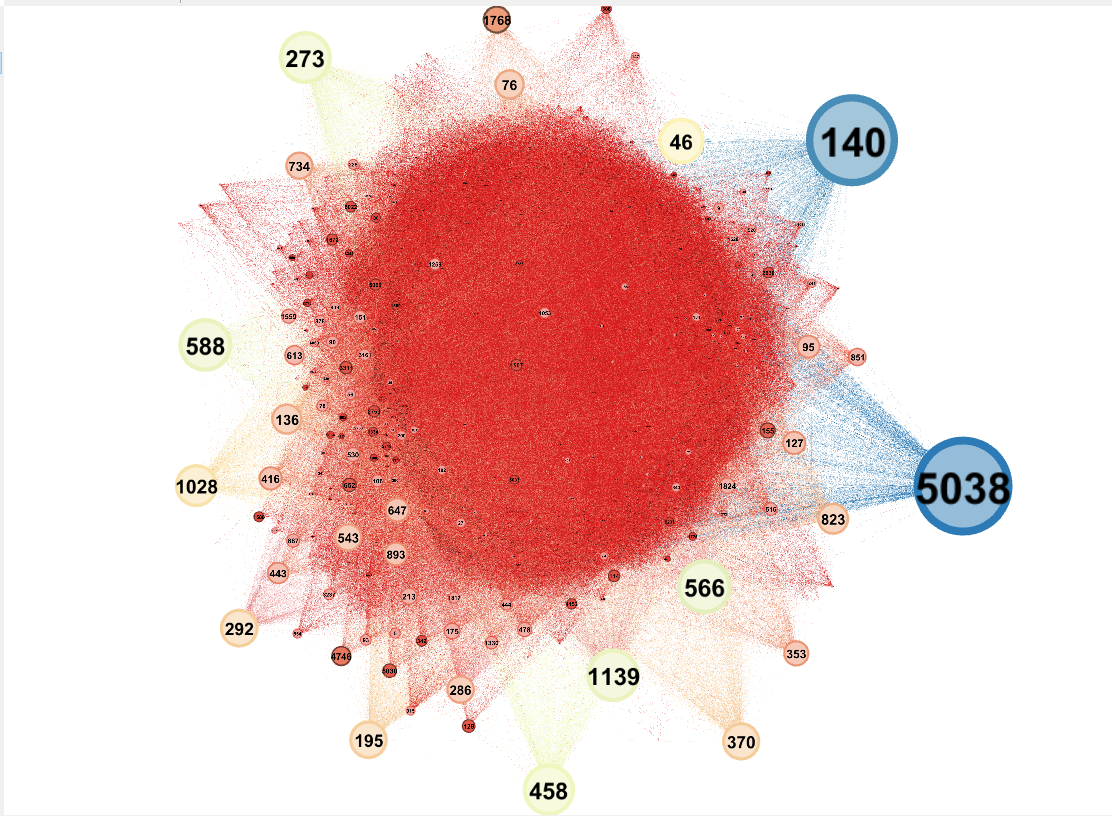

In [11]:
Image(filename='enron_betweenness.png')

CitNet graph plot where node size and color is proportional to the degree centrality:

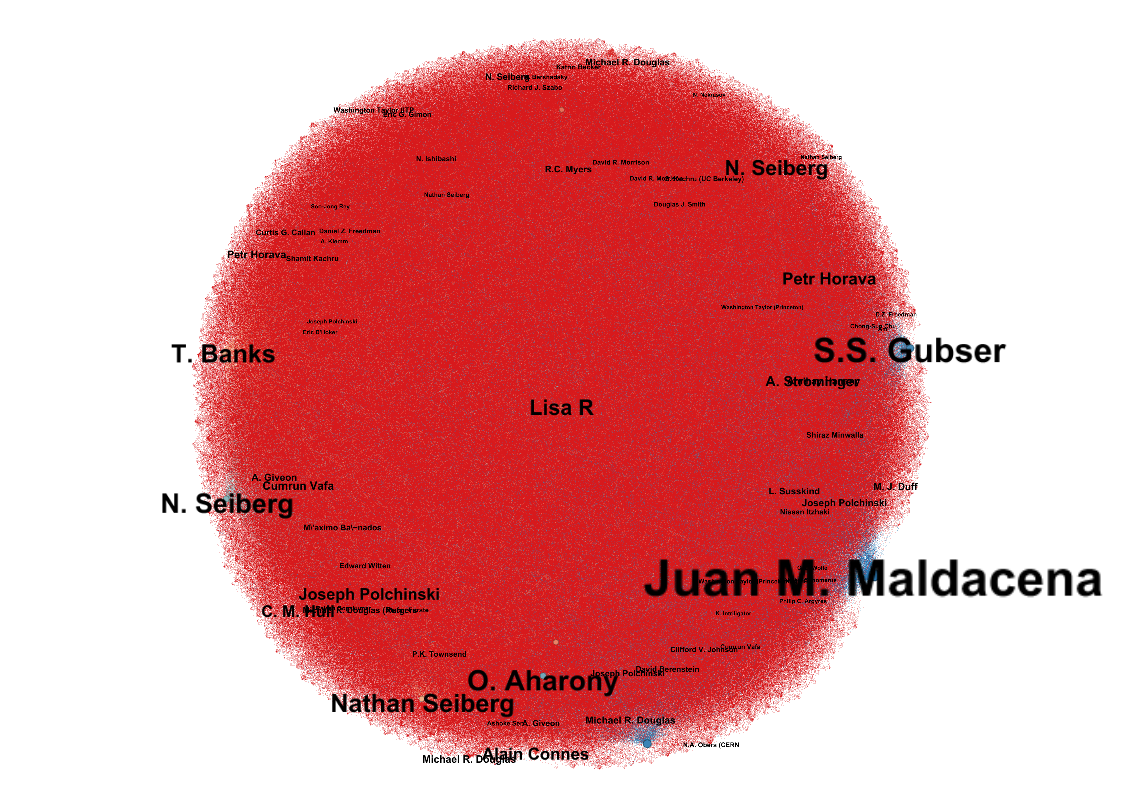

In [12]:
Image(filename='citnet_degree.PNG')

Erdos graph plot where node size is proportional to the degree centrality:

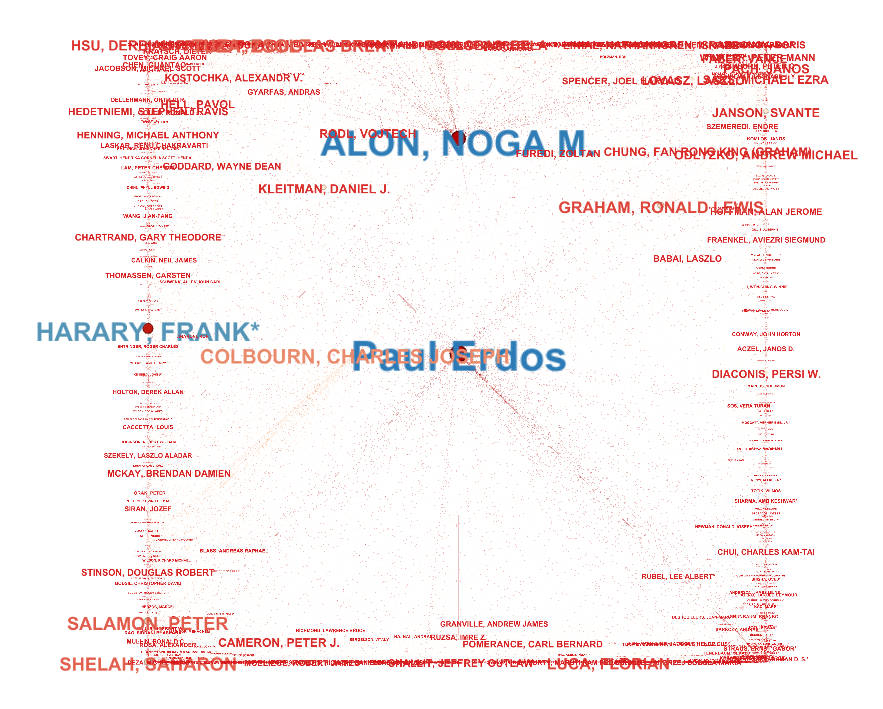

In [13]:
Image(filename='erdos_degree.png')

he most important nodes in the networks are: \\
1) For Facebook:
        Node no. 107 \\

2) For Enron:
         Node no. 5038

Both the nodes have the highest degree centrality and betweenness centrality in their respective networks, which means that the nodes have highest number of connections in the network and also appear the most number of times in the shortest path between any two nodes in the network.